In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

Epoch= 500
>error=3.100


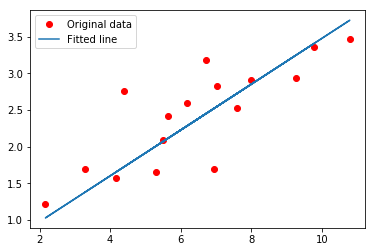

Epoch= 1000
>error=2.789


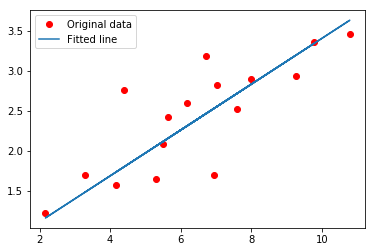

Epoch= 2000
>error=2.608


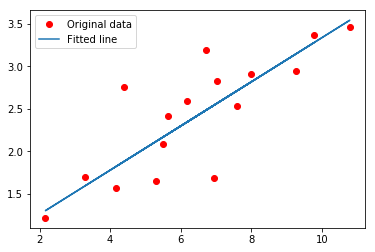

In [54]:
# Make a prediction with coefficients
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return yhat

def coefficients_sgd(train, l_rate, n_epoch):
    coef = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            yhat = predict(row, coef)
            error = yhat - row[-1]
            sum_error += error**2
            coef[0] = coef[0] - l_rate * error
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
    print('>error=%.3f' % (sum_error))
    return coef

train_X= [3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27]
train_Y =[1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94]

dataset = []
for i in range(len(train_X)):
    dataset.append([train_X[i],train_Y[i]])

epoch=[500,1000,2000]
for ep in epoch:
    print('Epoch=',ep)
    coef = coefficients_sgd(dataset, 0.0005, ep)
    with tf.Session() as sess:
        plt.plot(train_X, train_Y, 'ro', label='Original data')
        plt.plot(train_X, sess.run(tf.multiply(coef[1],train_X)+coef[0]), label='Fitted line')
        plt.legend()
        plt.show()
        sess.close()